# Model Performance

In [20]:
import re
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams.update({'font.size': 18})


In [21]:
class ModelPerformanceData:
    def __init__(self):
        self.epoch = []
        self.acc = []
        self.loss =[]
        self.val_acc = []
        self.val_loss = []

    def append(self, epoch, acc, loss, val_acc, val_loss):
        self.epoch.append(epoch)
        self.acc.append(acc)
        self.loss.append(loss)
        self.val_acc.append(val_acc)
        self.val_loss.append(val_loss)

    @staticmethod
    def from_ls_output(bash_output):
        data = ModelPerformanceData()
        epoch = 0
        # Extract values from text file.
        with open(bash_output) as f:
            lines = f.readlines()
        for line in lines:
            matches = re.findall(r'epoch\d+[^\d]+(\d+\.\d+)[^\d]+(\d+\.\d+)[^\d]+(\d+\.\d+)[^\d]+(\d+\.\d+)', line)
            if len(matches) > 0:
                epoch += 1
                values = tuple([epoch] + list(map(lambda v: float(v), matches[0])))
                data.append(*values)
        return data

In [49]:
def plot_model_acc(plot_data, ax, epochs=100, ticks=5):
    ax.plot(plot_data.epoch, plot_data.acc, label='Training set', color='r')
    ax.plot(plot_data.epoch, plot_data.val_acc, label='Validation set', color='g')
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1, 0.1))
    ax.set_ylabel('Accuracy') 
    
    ax.legend()
    ax.grid(color='#eeeeee', linestyle='-', linewidth=2)
    ax.set_xticks(np.arange(0, epochs, ticks))
    ax.set_xlim(0, epochs)

def plot_model_loss(plot_data, ax, epochs=100, ticks=5):
    ax.plot(plot_data.epoch, plot_data.loss, label='Training set', color='r')
    ax.plot(plot_data.epoch, plot_data.val_loss, label='Validation set', color='g')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')   
    
    ax.legend()
    ax.grid(color='#eeeeee', linestyle='-', linewidth=2)
    ax.set_xticks(np.arange(0, epochs, ticks))
    ax.set_xlim(0, epochs)

def plot_model_acc_only(plot_data, epochs=100, ticks=5, figsize=(15, 12)):
    f, ax = plt.subplots(figsize=figsize)
    plot_model_acc(plot_data, ax, epochs=epochs, ticks=ticks)
    ax.set_xlabel('Epoch')  
    
    return f
    
def plot_model_perf(plot_data, title='Model performance', epochs=100, ticks=5, figsize=(15, 12)):
    # Plot values
    f, axarr = plt.subplots(2, figsize=figsize, sharex=True)
    if title:
        f.suptitle(title, fontsize=20)
    # Plot accuracy 
    plot_model_acc(plot_data, axarr[0], epochs=epochs, ticks=ticks)
    
    # Plot loss curves
    plot_model_loss(plot_data, axarr[1], epochs=epochs, ticks=ticks)
    return f

## VGG16

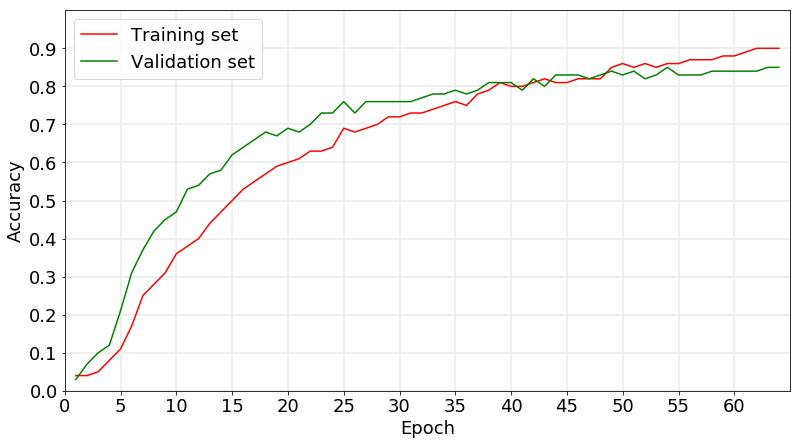

In [50]:
data = ModelPerformanceData.from_ls_output('model-02-vgg16-part-01-train-history.txt')
fig = plot_model_acc_only(data, epochs=65, figsize=(13, 7))
fig.savefig('fig-acc-loss-vgg16-part1.pdf', bbox_inches='tight')

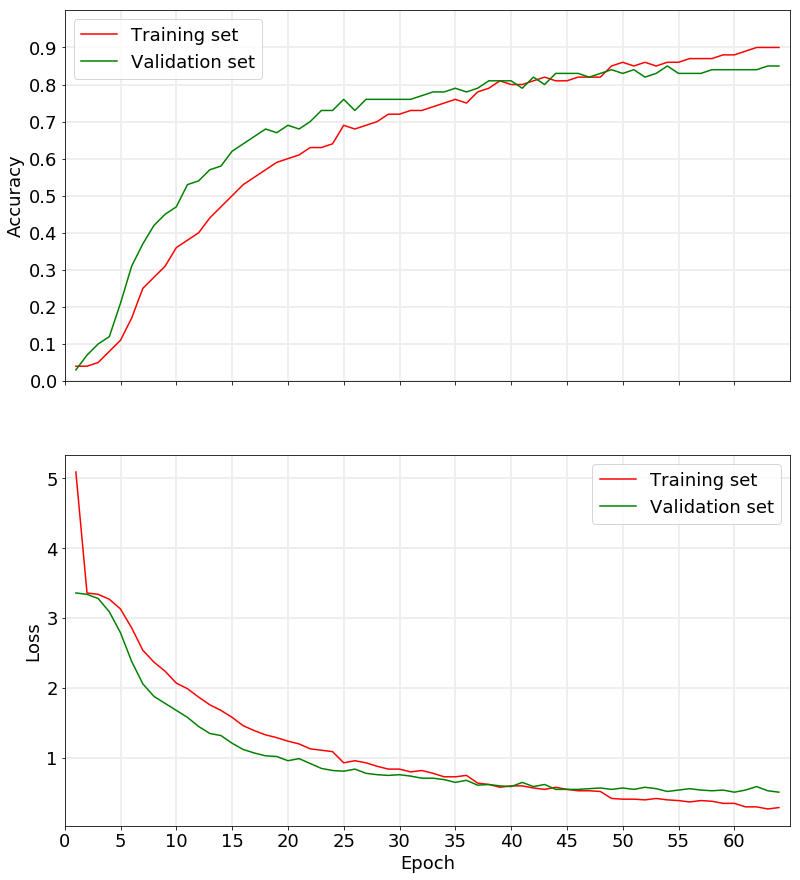

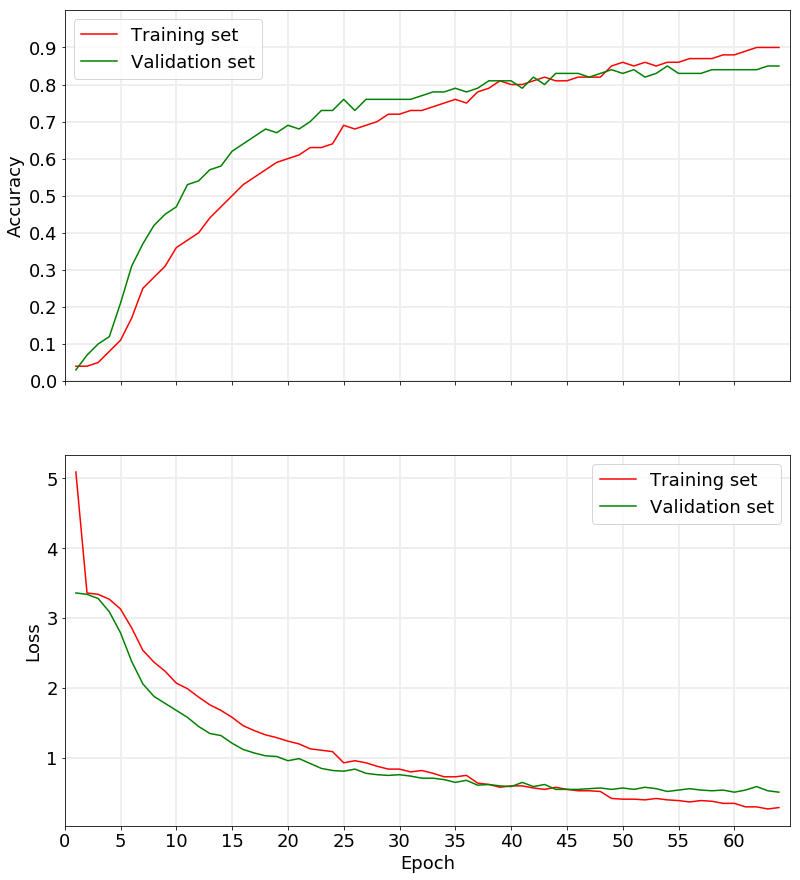

In [48]:
data = ModelPerformanceData.from_ls_output('model-02-vgg16-part-01-train-history.txt')
plot_model_perf(data, title=None, epochs=65, figsize=(13, 15))

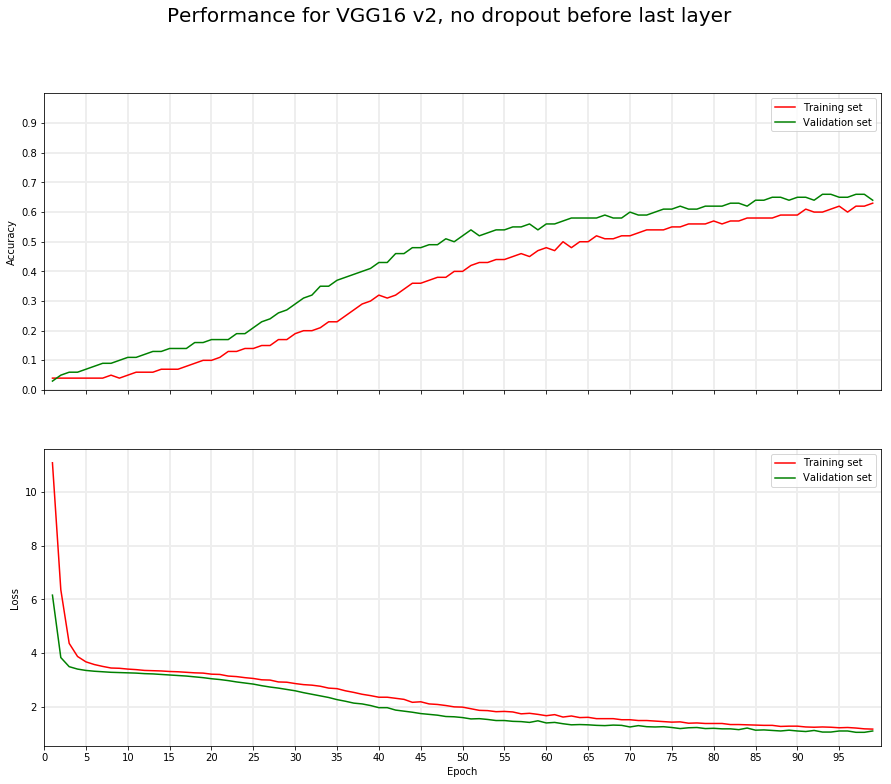

In [5]:
data = ModelPerformanceData.from_ls_output('model-02-vgg16v2-part-01-train-history.txt')
plot_model_perf(data, 'Performance for VGG16 v2, no dropout before last layer')

## VGG19

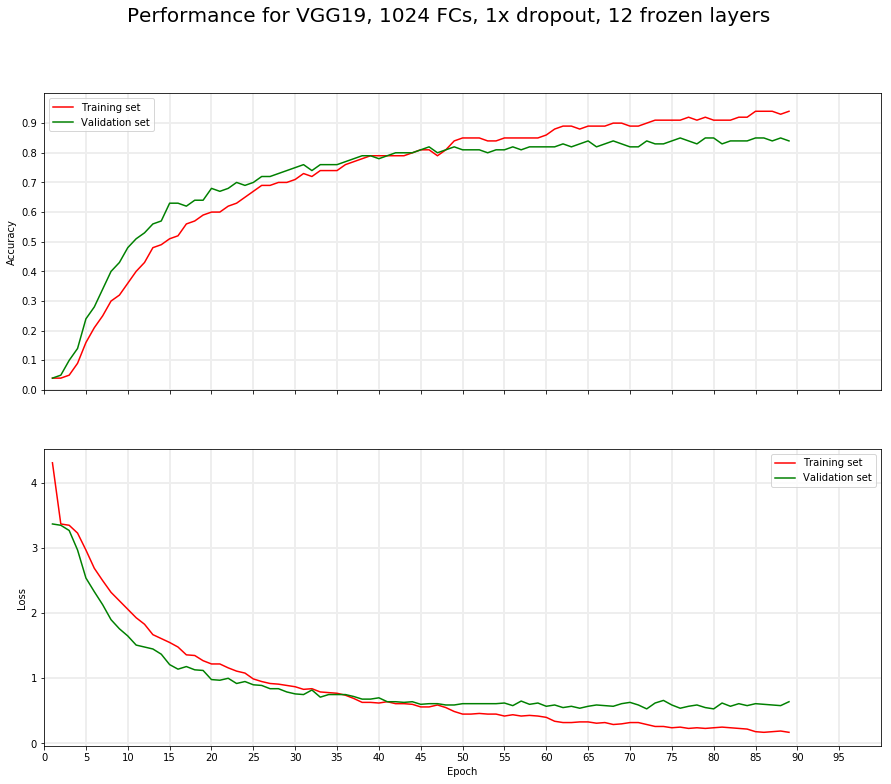

In [6]:
data = ModelPerformanceData.from_ls_output('model-04-vgg19-type-4-train-history.txt')
plot_model_perf(data, 'Performance for VGG19, 1024 FCs, 1x dropout, 12 frozen layers')

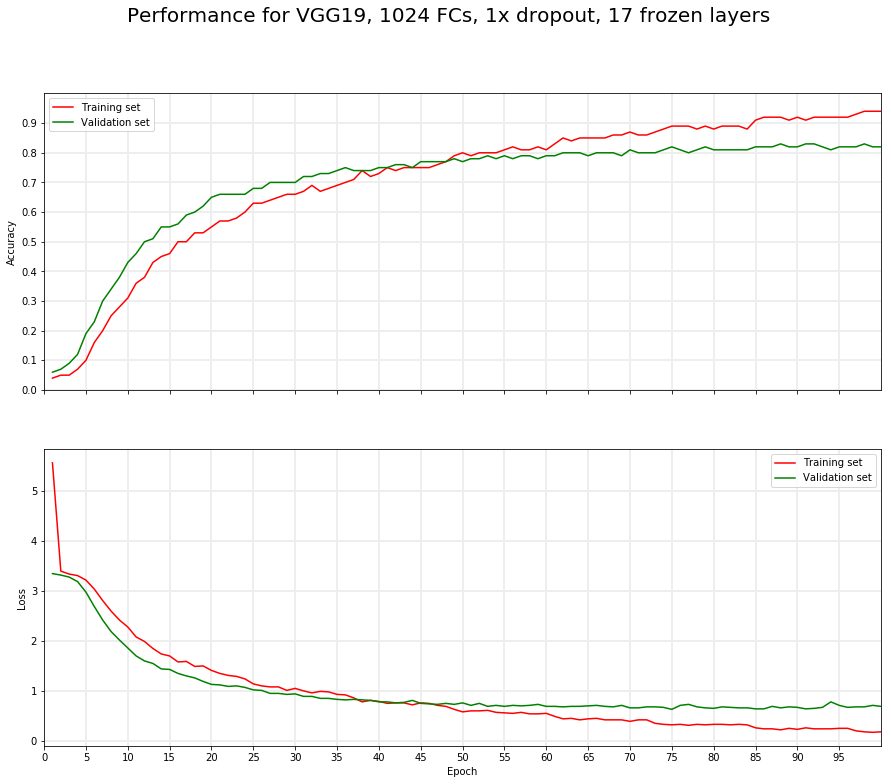

In [7]:
data = ModelPerformanceData.from_ls_output('model-04-vgg19-type-5-train-history.txt')
plot_model_perf(data, 'Performance for VGG19, 1024 FCs, 1x dropout, 17 frozen layers')

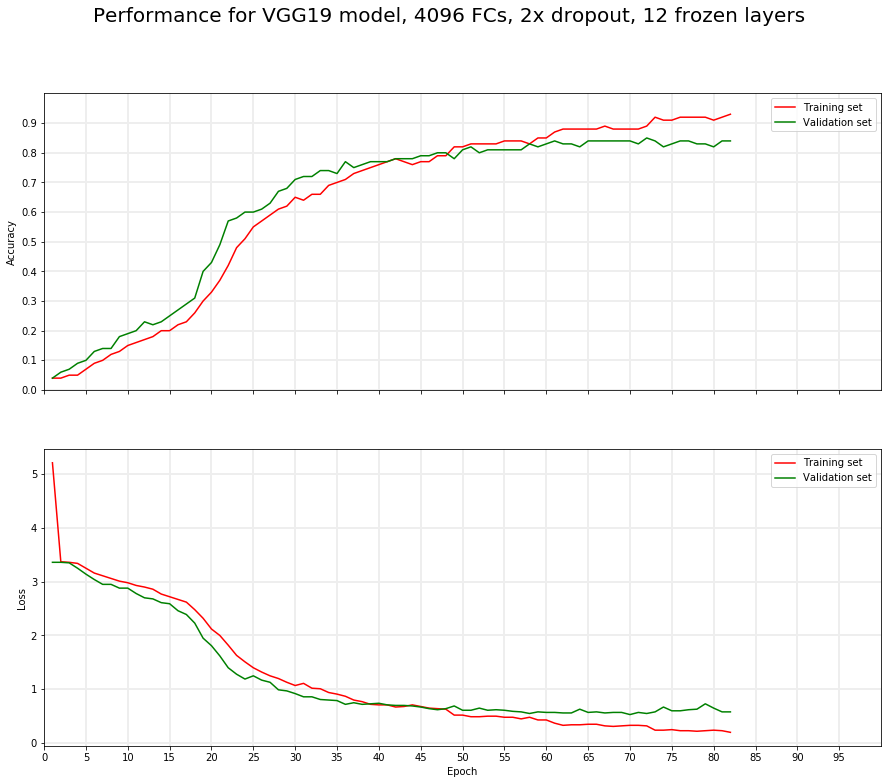

In [8]:
data = ModelPerformanceData.from_ls_output('model-06-vgg19v2-type-1-train-history.txt')
plot_model_perf(data, 'Performance for VGG19 model, 4096 FCs, 2x dropout, 12 frozen layers')

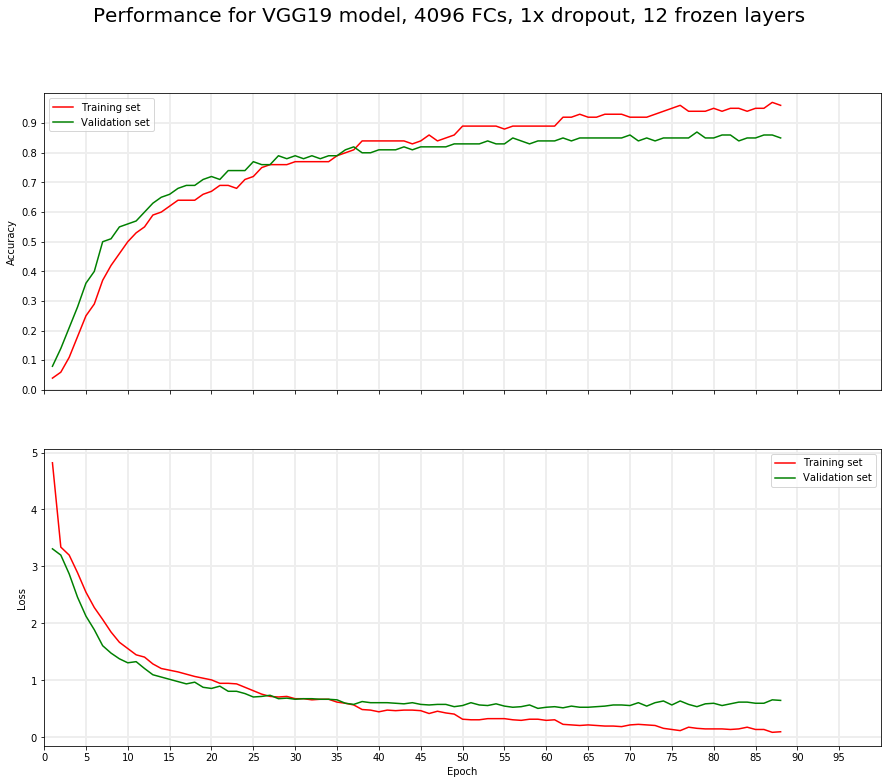

In [9]:
data = ModelPerformanceData.from_ls_output('model-08-vgg19v3-type-1-train-history.txt')
plot_model_perf(data, 'Performance for VGG19 model, 4096 FCs, 1x dropout, 12 frozen layers')

## Inception v3

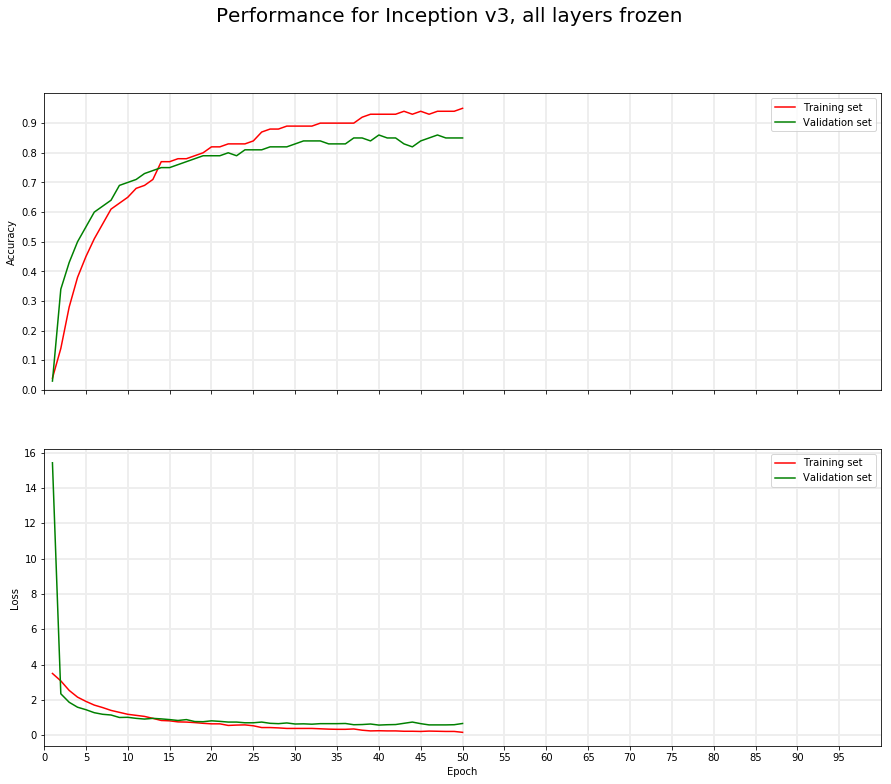

In [10]:
data = ModelPerformanceData.from_ls_output('model-03-inceptionv3-part-01-train-history.txt')
plot_model_perf(data, 'Performance for Inception v3, all layers frozen')

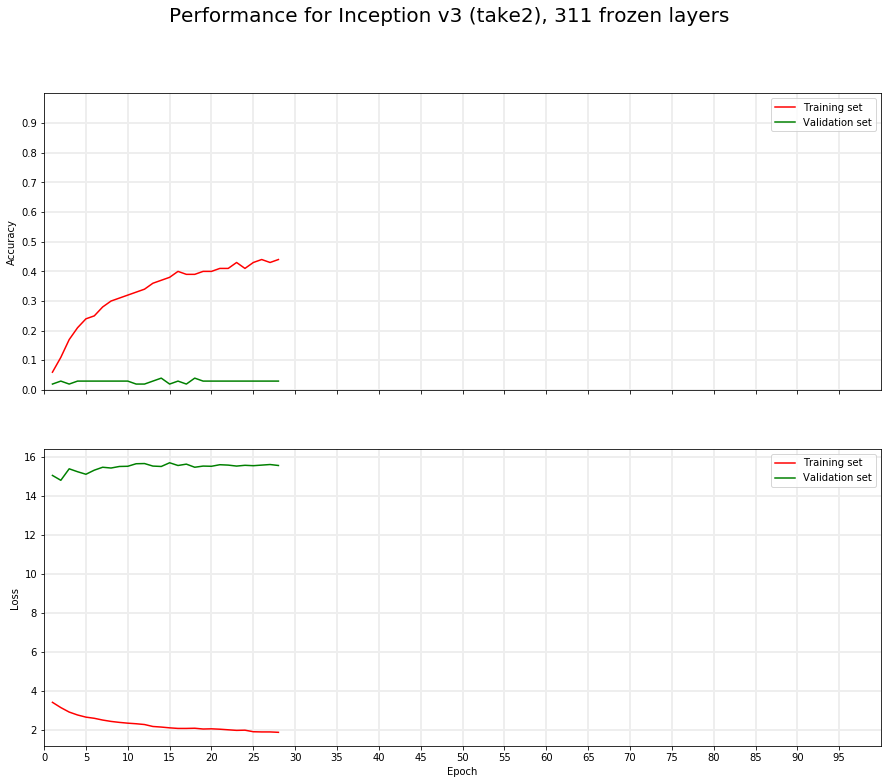

In [11]:
data = ModelPerformanceData.from_ls_output('model-07-inceptionv3-take-2-part-01-train-history.txt')
plot_model_perf(data, 'Performance for Inception v3 (take2), 311 frozen layers')

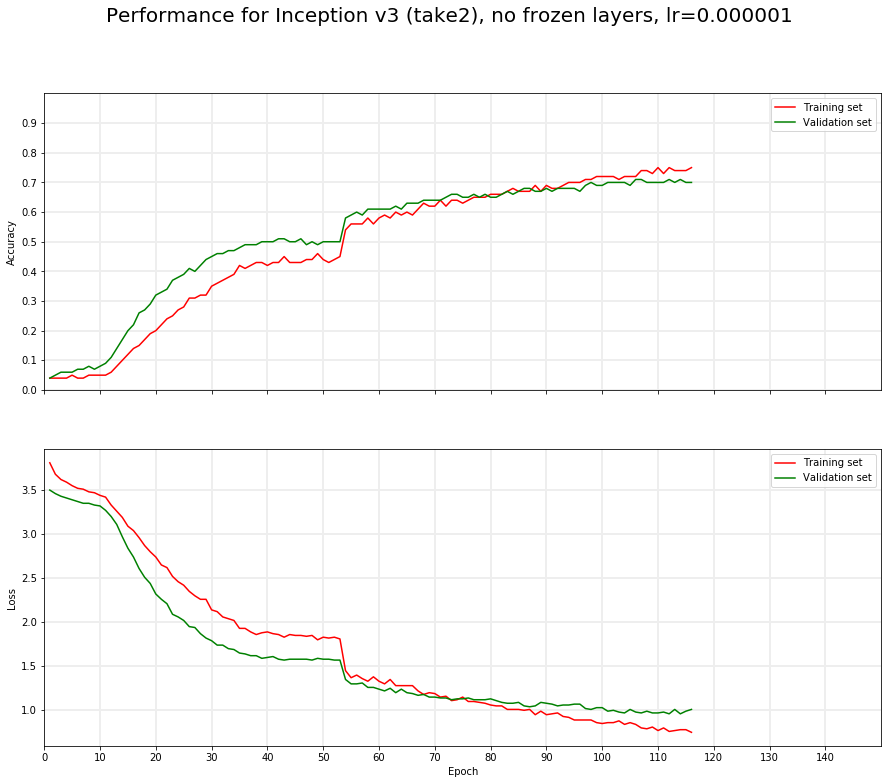

In [12]:
data = ModelPerformanceData.from_ls_output('model-07-inceptionv3-take-2-part-02-train-history.txt')
plot_model_perf(data, 'Performance for Inception v3 (take2), no frozen layers, lr=0.000001', epochs=150, ticks=10)